In [12]:
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
# matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [16]:
with open('../data/YearPredictionMSD') as f : 
    ls=f.readlines() 
res=[] 
for l in ls: 
    l=l.replace("  "," ") 
    res.append(l)
with open("../data/YearPredictionMSD-proc", 'w') as f: 
    f.writelines(res)

In [3]:
# λ
λs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# Covtype 
cov_client1 = [0.90, 0.91, 0.91, 0.92, 0.90, 0.88]
cov_client2 = [0.67, 0.69, 0.70, 0.71, 0.71, 0.69]
cov_client3 = [0.91, 0.93, 0.94, 0.93, 0.93, 0.92]
cov_client4 = [0.75, 0.78, 0.81, 0.79, 0.79, 0.79]
cov_client5 = [0.92, 0.93, 0.93, 0.94, 0.95, 0.92]

# FMNIST
fmnist_client1 = [0.87, 0.88, 0.88, 0.88, 0.87, 0.87]
fmnist_client2 = [0.75, 0.76, 0.78, 0.79, 0.79, 0.76]
fmnist_client3 = [0.80, 0.80, 0.83, 0.84, 0.86, 0.85]
fmnist_client4 = [0.82, 0.84, 0.86, 0.84, 0.83, 0.80]
fmnist_client5 = [0.82, 0.86, 0.88, 0.89, 0.89, 0.87]

# Cifar10 
## row: client, col: lambda 
cf=[[0.4, 0.46, 0.49, 0.47, 0.48, 0.47],
    [0.45, 0.47, 0.42, 0.4, 0.38, 0.35],
    [0.38, 0.4 , 0.43, 0.42, 0.3 , 0.29],
    [0.42, 0.42, 0.47, 0.5 , 0.48, 0.43], 
    [0.43, 0.45, 0.47, 0.45, 0.25, 0.24],]
cf=np.array(cf) 

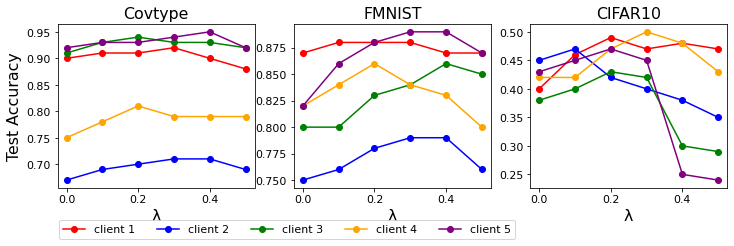

In [5]:
font = {# 'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 11, 
    }
import matplotlib
matplotlib.rc('font', **font)
params = {
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
} 
plt.rcParams.update(params)

fig, ax = plt.subplots(1,3)
fig.set_size_inches(12, 3)

# Covtype
ax[0].plot(λs, cov_client1, 'o-', label='client 1', color='red')
ax[0].plot(λs, cov_client2, 'o-', label='client 2', color='blue')
ax[0].plot(λs, cov_client3, 'o-', label='client 3', color='green')
ax[0].plot(λs, cov_client4, 'o-', label='client 4', color='orange')
ax[0].plot(λs, cov_client5, 'o-', label='client 5', color='purple')
ax[0].title.set_text('Covtype')
# ax[0].set(yticks=[0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
ax[0].set(xlabel='λ')
ax[0].set(ylabel='Test Accuracy')

lgd=fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0),
          fancybox=True, ncol=5)
# FMNIST
ax[1].plot(λs, fmnist_client1, 'o-', label='client 1', color='red')
ax[1].plot(λs, fmnist_client2, 'o-', label='client 2', color='blue')
ax[1].plot(λs, fmnist_client3, 'o-', label='client 3', color='green')
ax[1].plot(λs, fmnist_client4, 'o-', label='client 4', color='orange')
ax[1].plot(λs, fmnist_client5, 'o-', label='client 5', color='purple')
# ax[1].set(yticks=[0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
ax[1].title.set_text('FMNIST')
ax[1].set(xlabel='λ')

#cf10  
ax[2].plot(λs, cf[0,:], 'o-', label='client 1', color='red')
ax[2].plot(λs, cf[1], 'o-', label='client 2', color='blue')
ax[2].plot(λs, cf[2], 'o-', label='client 3', color='green')
ax[2].plot(λs, cf[3], 'o-', label='client 4', color='orange')
ax[2].plot(λs, cf[4], 'o-', label='client 5', color='purple')
# ax[2].set(yticks=[0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
ax[2].title.set_text('CIFAR10')
ax[2].set(xlabel='λ')
plt.savefig('fig.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
